## Dependencies

```
# 60.19/20
01c932213afb09e5df84b8f061315ccaf01150b4  ../../data/shehui/shehui_phones_loglik.csv
1dc688287a27da6582e17cc3e04ad8fe1a928ce4  ../../data/shehui/shehui_feats.csv
```

In [1]:
phones_df_path = "../../data/shehui/shehui_phones_loglik.csv"
feats_df_path = "../../data/shehui/shehui_feats.csv"
!sha1sum $phones_df_path $feats_df_path

01c932213afb09e5df84b8f061315ccaf01150b4  ../../data/shehui/shehui_phones_loglik.csv
1dc688287a27da6582e17cc3e04ad8fe1a928ce4  ../../data/shehui/shehui_feats.csv


## Load Data

In [2]:
import pandas as pd
WORD = "社會"
phones_df = pd.read_csv(phones_df_path)
feats_df = pd.read_csv(feats_df_path)

In [3]:
phones_df.head()

,utt_id,t,phone,ml_phone,sil,spn,a,aj,aw,o,...,ts,tsʰ,ɕ,z,z̩,s,ŋ,ŋ̍,ɻ,ʔ
0,XSH_GY_3144,0,s,s,-7.681640,-6.503642,-4.345111,-8.721248,-8.010677,-7.272399,...,-1.886970,-3.645827,-3.640338,-4.887408,-2.941501,-1.147632,-5.503642,-5.503642,-12.391040,-16.211841
1,XSH_GY_3144,1,s,ts,-5.310816,-6.586954,-8.147581,-10.421438,-7.652265,-7.322141,...,-1.226126,-3.822740,-3.268888,-6.033983,-4.088075,-1.321073,-7.533209,-7.533209,-12.929338,-17.819410
2,XSH_GY_3144,2,s,ts,-5.749047,-5.802193,-6.734258,-7.944333,-8.090920,-8.237176,...,-0.969098,-3.513551,-3.404324,-6.641660,-4.695748,-1.230424,-8.741521,-8.741521,-12.683087,-18.482972
3,XSH_GY_3144,3,s,s,-6.987211,-4.373899,-9.618829,-8.396303,-8.528719,-8.476888,...,-1.617296,-4.674959,-2.562410,-7.692209,-5.746301,-0.717901,-8.726934,-8.726934,-13.768919,-20.936250
4,XSH_GY_3144,4,s,s,-4.199553,-4.513033,-7.592516,-7.766592,-6.352526,-8.014597,...,-3.196867,-5.620840,-1.458639,-7.029349,-5.083437,-0.723299,-6.967547,-6.967547,-13.110853,-17.870264


In [4]:
phone_table = phones_df.columns[4:].values
len(phone_table)

45

Text(0.5, 1.0, 'HSK_GY_0046 社會')

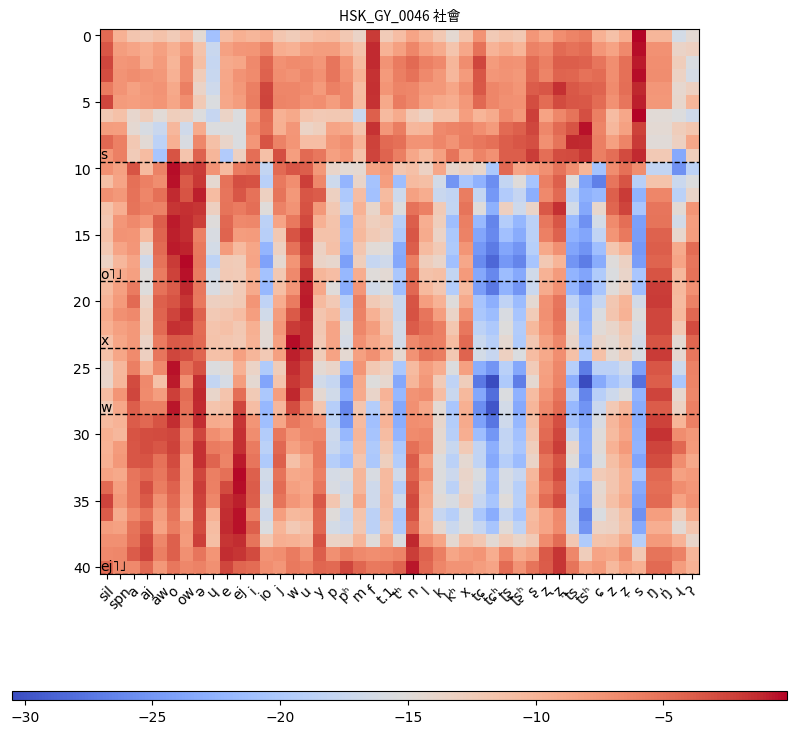

In [6]:
from typing import cast
import matplotlib.pyplot as plt

utt_id = phones_df.utt_id.unique()[12]
# utt_id = "XSH_GY_0831"  # highly-reduced one
# utt_id = "CZX_GY_5429"  # standard one
utt_df = phones_df.loc[phones_df["utt_id"] == utt_id, :]
pmat = utt_df.iloc[:, 4:].values

fig = plt.figure(figsize=(10, 10*(pmat.shape[0]/pmat.shape[1])+1))
plt.imshow(pmat, 
            cmap="coolwarm")

for phone, phone_grp in utt_df.groupby("phone", sort=False):
    t_end = phone_grp.iloc[-1].t
    phone = cast(str, phone)
    plt.text(-0.5, t_end+0.5, phone, va="bottom")
    plt.axhline(t_end+0.5, color="black", 
            linewidth=1, linestyle="dashed")

xticks = range(0, len(phone_table), 1)
xticklabels = [phone_table[y] for y in xticks]
plt.xticks(xticks, xticklabels, rotation=45) 
plt.colorbar(location="bottom", aspect=80)
plt.title(f"{utt_id} {WORD}", fontsize=20, font="Noto Sans CJK JP")
# fig.savefig(str(fig_dir/f"{utt_x.utt_id}_{word_x.label}.png"))


In [6]:
from pathlib import Path
wav_dir = Path(f"~/lago/mfa_data/xianzai/s1/").expanduser()
utt_id = "CZX_GY_5429"
from IPython.display import Audio
Audio(wav_dir/f"{utt_id}.wav", rate=22050)

## Visualize MFCC

In [7]:
feats_df.head()

,utt_id,t,phone,ml_phone,0,1,2,3,4,5,...,30,31,32,33,34,35,36,37,38,39
0,XSH_GY_3144,0,s,s,3.827123,0.014301,-0.954937,1.171654,-0.181721,-2.039932,...,-0.496123,-0.670348,-1.269085,0.846864,-1.274111,-0.212825,-0.024253,-0.196060,-0.356132,-0.487478
1,XSH_GY_3144,1,s,ts,4.232590,-0.077859,-2.850115,1.386731,-0.403238,-1.860933,...,-0.693673,-0.176992,-1.056674,0.960175,-1.511179,-0.490762,-0.285694,-1.113948,-0.461640,-0.505379
2,XSH_GY_3144,2,s,ts,4.683220,-0.245749,-1.184790,1.599230,-0.321785,-1.731373,...,0.385848,0.714736,-0.954233,0.166337,-1.601247,-0.767266,0.317865,-0.058375,-0.534943,-0.009281
3,XSH_GY_3144,3,s,s,5.077373,-0.241191,-0.965369,1.664450,0.246305,-1.645607,...,0.172580,0.140752,-0.789091,-0.772434,-1.679472,-0.238112,1.466935,0.208873,-0.108599,1.084938
4,XSH_GY_3144,4,s,s,5.578301,-0.155273,-0.303422,1.544524,-0.081378,-1.639353,...,-1.149010,-0.967828,-0.292938,-0.637640,-1.690858,0.225054,0.868094,0.370985,-0.301624,1.104280


In [11]:
from sklearnex.manifold import TSNE
base_feat_idx = feats_df.columns.values.tolist().index("ml_phone")+1
feats_mat = feats_df.iloc[:,base_feat_idx:]
tsne = TSNE(perplexity=50)
feats_proj = tsne.fit_transform(feats_mat)


/home/seantyh/miniconda3/envs/mfa/lib/python3.11/site-packages/daal4py/sklearn/manifold/_t_sne.py:361: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn("The PCA initialization in TSNE will change to "


Text(0, 0.5, 'tSNE-2')

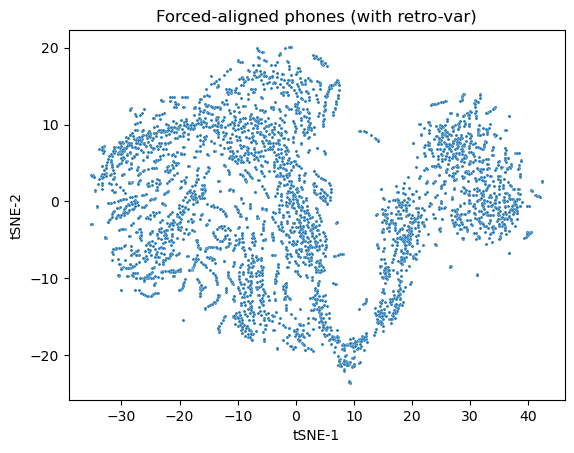

In [12]:
import seaborn as sns
sns.scatterplot(x=feats_proj[:,0], y=feats_proj[:,1], s=5)
plt.title("Forced-aligned phones (with retro-var)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")


Text(0, 0.5, 'tSNE-2')

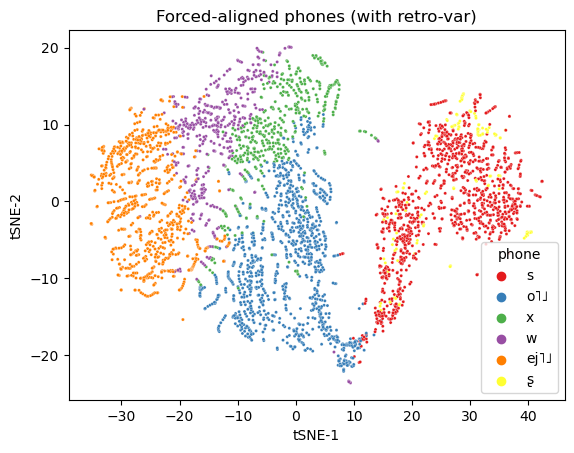

In [13]:
import seaborn as sns
sns.scatterplot(x=feats_proj[:,0], y=feats_proj[:,1], 
                hue=feats_df["phone"], palette="Set1",
                s=5)
plt.title("Forced-aligned phones (with retro-var)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")


Text(0.5, 0.9, 'max-logLik phones (with retro-var)')

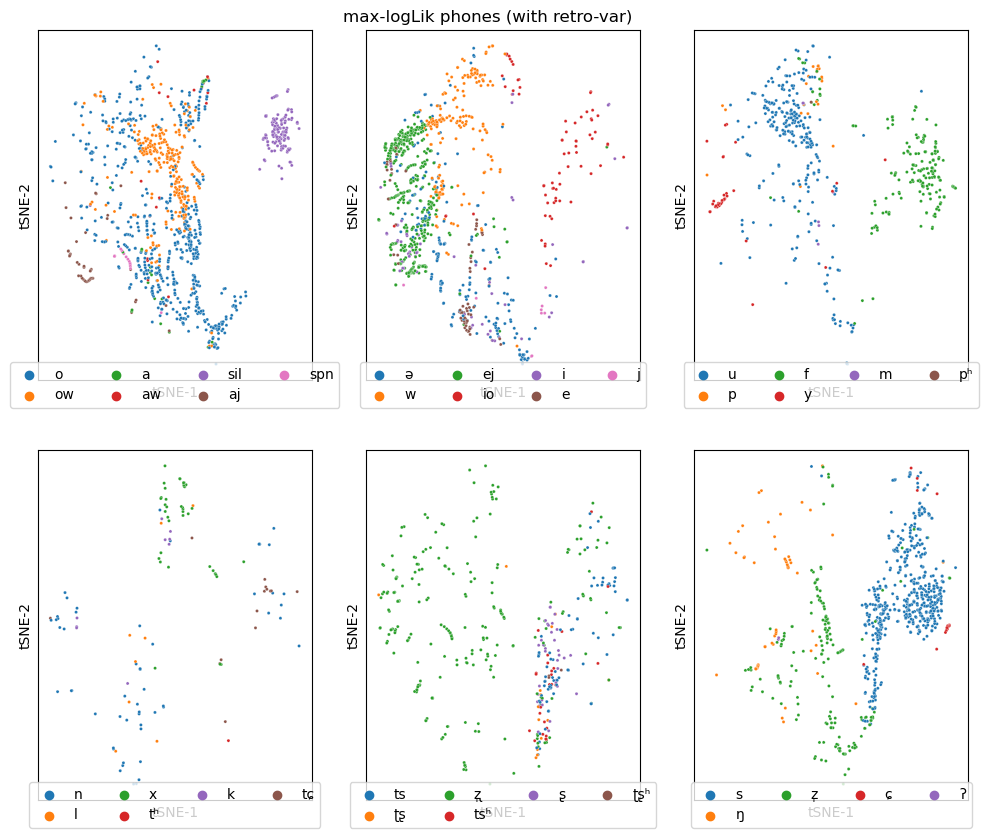

In [14]:
fig = plt.figure(figsize=(12, 10))
for ax_i in range(6):
    plt.subplot(2, 3, ax_i+1)
    sidx = ax_i*len(phone_table)//6
    eidx = (ax_i+1)*len(phone_table)//6
    subset_mask = feats_df["ml_phone"].isin(phone_table[sidx:eidx])
    sns.scatterplot(x=feats_proj[subset_mask,0], y=feats_proj[subset_mask,1], 
                    hue=feats_df["ml_phone"][subset_mask], palette="tab10",
                    s=5)
    plt.xlabel("tSNE-1")
    plt.ylabel("tSNE-2")
    plt.yticks([])
    plt.xticks([])
    plt.gca().legend(loc="lower center", ncols=4, bbox_to_anchor=(0.5, -0.1))
fig.suptitle("max-logLik phones (with retro-var)", y=.9)